### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


### Read the dataset

In [4]:
df = pd.read_csv('bank.csv')

In [5]:
df.shape

(10000, 14)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- The dataset consist of 3 categorical columns and 11 numerical columns
- There are no null values in the dataset

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
print(df['Exited'].value_counts(dropna=False))
print(df['Exited'].value_counts(dropna=False, normalize=True)*100)

0    7963
1    2037
Name: Exited, dtype: int64
0    79.63
1    20.37
Name: Exited, dtype: float64


- The average credit score of customers is 650
- The average age for customer is 38 while the minimum customer age is 18 which confirms all customers are above the age limit to qualify for a bank account
- The average customr tenure is 5 years while maximum tenure is 10 years. 
- The average account balance for customer is 76485
- On average around 70% of all customers has a credit card associated with the bank
- About 50% of overall customers are active members
- Average customer salary is around 100k
- About 20% of all customers in the data exited which represents a farly imbalanced dataset

### Drop the columns which are unique for all users like IDs

In [10]:
df[['RowNumber', 'CustomerId']].nunique() / len(df)

RowNumber     1.0
CustomerId    1.0
dtype: float64

We will drop these 2 columns since they are 100% unique and does not add value

In [11]:
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)

In [12]:
df.shape

(10000, 12)

### Perform bivariate analysis and give your insights from the same (5 points) 

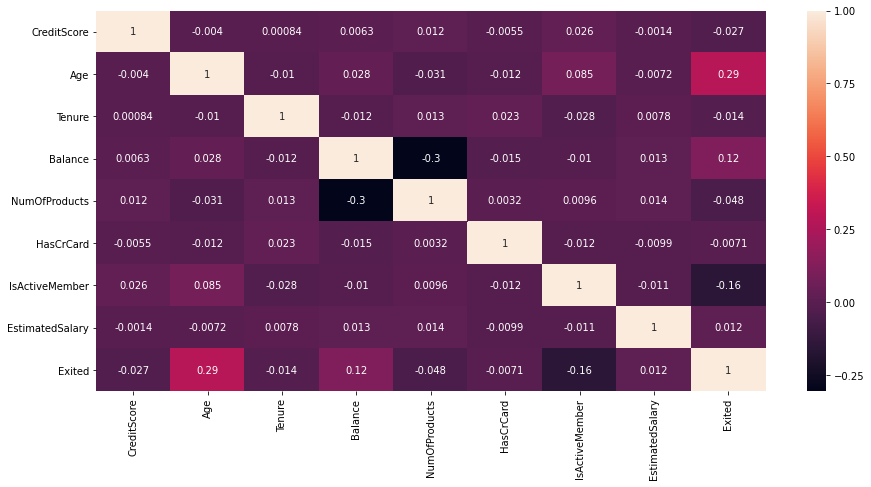

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Insights:
- Age and Exited is positively correlated with correlation of ~0.3
- NumOfProducts and Balance is negatively correlated with correlation of -0.3. 

In [14]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

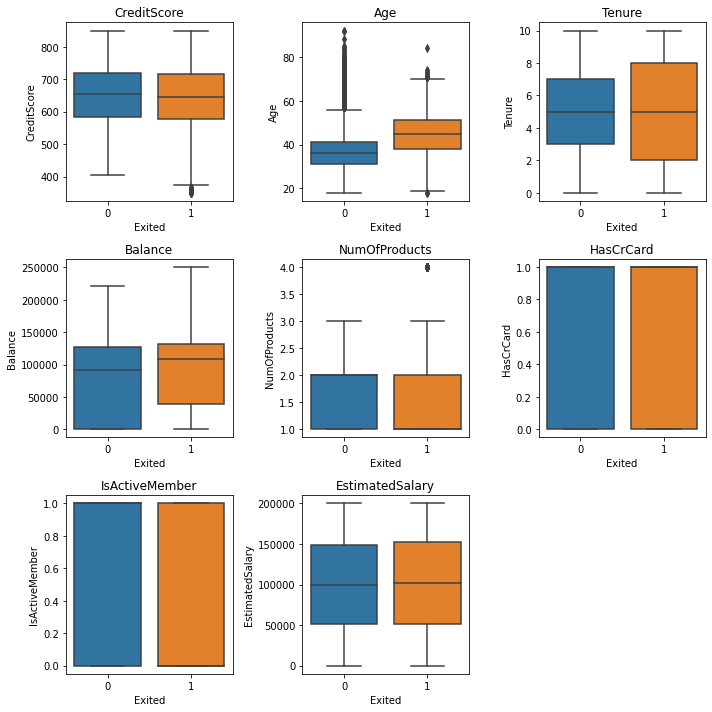

In [15]:
cols = df[['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df["Exited"], df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Customers with lower credit limit are more likely to churn
- Customers having higher age are more likely to churn
- Customers with high tenure is more likely to churn

In [16]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, df["Exited"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, df["Exited"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


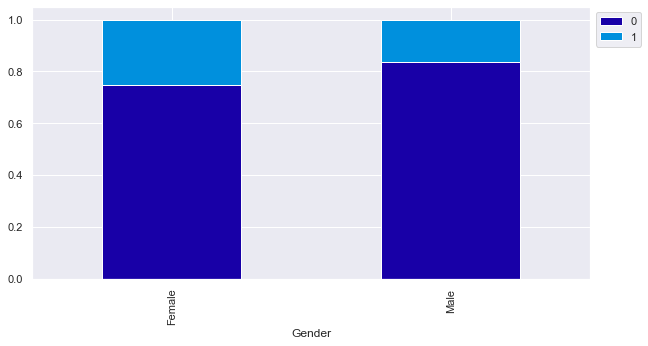

In [17]:
stacked_plot(df["Gender"])

- Male customers have a more likelihood of exiting compared to female

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


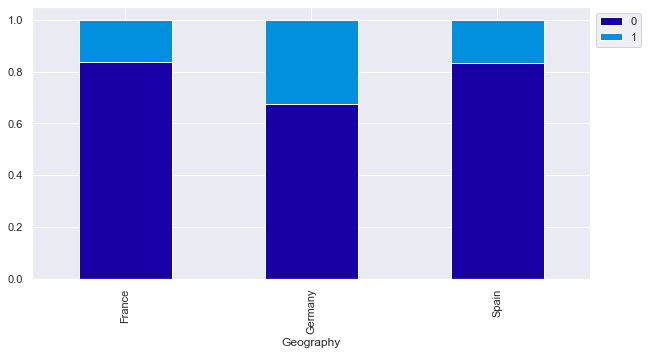

In [18]:
stacked_plot(df["Geography"])

- Customers in France and Spain have higher likelihood to exit than Germany

In [19]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(col, df[col].nunique())

Surname 2932
Geography 3
Gender 2


In [20]:
df['Surname'].nunique() 

2932

In [21]:
# drop Surname due to high cardinality and it does not also explain the target column
df.drop('Surname', axis=1, inplace=True)

In [22]:
df.shape

(10000, 11)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### Distinguish the feature and target set and divide the data set into training and test sets 

In [25]:
X = df.iloc[:, :10]
y = df.iloc[:,10]

In [26]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [27]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [28]:
# convert to array for further processing
X = X.values
y = y.values

### Label encoding and One hot encoding 

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Gender column
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [30]:
X[:10, :]

array([[619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

#### For geography column we will apply One hot encoding as it does not have an ordinal relationship

In [31]:
# Geography column
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [32]:
# verify the result
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [33]:
print(y)

[1 0 1 ... 1 1 0]


### Split data into train and test

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Normalize the train and test data

Feature scaling is necessary for ANN models so that all the columns are given equal weight 

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling fitted only to training set to avoid information leakage.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Initialize & build the model. Identify the points of improvement and implement the same. 

In [45]:
# we will use Sequential class to train the NN model
model = tf.keras.models.Sequential()

In [46]:
# add input and first hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [47]:
# add second hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [48]:
# add output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [49]:
# compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We use standard adam optimizer and loss function as binary_crossentropy as the label column is binary. Finally we will measure the performance using accuracy metric

In [50]:
# train ANN on train data using 100 epochs
model.fit(X_train, y_train, batch_size=32, epochs=100)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 77us/sample - loss: 0.5550 - accuracy: 0.7636
Epoch 2/100
8000/8000 [==============================] - 0s 38us/sample - loss: 0.4661 - accuracy: 0.7974
Epoch 3/100
8000/8000 [==============================] - 0s 33us/sample - loss: 0.4405 - accuracy: 0.7996
Epoch 4/100
8000/8000 [==============================] - 0s 30us/sample - loss: 0.4239 - accuracy: 0.8146
Epoch 5/100
8000/8000 [==============================] - 0s 29us/sample - loss: 0.4059 - accuracy: 0.8292
Epoch 6/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.3902 - accuracy: 0.8365
Epoch 7/100
8000/8000 [==============================] - 0s 28us/sample - loss: 0.3799 - accuracy: 0.8378
Epoch 8/100
8000/8000 [==============================] - 0s 28us/sample - loss: 0.3721 - accuracy: 0.8447
Epoch 9/100
8000/8000 [==============================] - 0s 28us/sample - loss: 0.3665 - accuracy: 0.8494
Epoch 10/100
8000/8000 [

### Hyperparameter optimization - to improve the model performance

- We can try hyperparameter optimization of NN to imrpove the model performance. 
- We will tune by adding/changing hidden layers, activation function and units

In [51]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(units=30, activation='relu'))
model2.add(tf.keras.layers.Dense(units=20, activation='relu'))
model2.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [52]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
model2.fit(X_train, y_train, batch_size=32, epochs=100)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 102us/sample - loss: 0.4724 - accuracy: 0.7997
Epoch 2/100
8000/8000 [==============================] - 0s 45us/sample - loss: 0.4163 - accuracy: 0.8211
Epoch 3/100
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3928 - accuracy: 0.8357
Epoch 4/100
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3700 - accuracy: 0.8520
Epoch 5/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3568 - accuracy: 0.8593
Epoch 6/100
8000/8000 [==============================] - 0s 37us/sample - loss: 0.3485 - accuracy: 0.8596
Epoch 7/100
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3440 - accuracy: 0.8627
Epoch 8/100
8000/8000 [==============================] - 0s 29us/sample - loss: 0.3408 - accuracy: 0.8626
Epoch 9/100
8000/8000 [==============================] - 0s 32us/sample - loss: 0.3381 - accuracy: 0.8616
Epoch 10/100
8000/8000 

#### Reduce the batch_size to see if there is an improvement in accuracy

In [96]:
ann.fit(X_train, y_train, batch_size = 10, epochs = 100)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 134us/sample - loss: 0.3370 - accuracy: 0.8625
Epoch 2/100
8000/8000 [==============================] - 1s 88us/sample - loss: 0.3362 - accuracy: 0.8611
Epoch 3/100
8000/8000 [==============================] - 1s 84us/sample - loss: 0.3357 - accuracy: 0.8604
Epoch 4/100
8000/8000 [==============================] - 1s 87us/sample - loss: 0.3351 - accuracy: 0.8602
Epoch 5/100
8000/8000 [==============================] - 1s 97us/sample - loss: 0.3353 - accuracy: 0.8605
Epoch 6/100
8000/8000 [==============================] - 1s 85us/sample - loss: 0.3352 - accuracy: 0.8595
Epoch 7/100
8000/8000 [==============================] - 1s 85us/sample - loss: 0.3355 - accuracy: 0.8621
Epoch 8/100
8000/8000 [==============================] - 1s 91us/sample - loss: 0.3353 - accuracy: 0.8594
Epoch 9/100
8000/8000 [==============================] - 1s 79us/sample - loss: 0.3353 - accuracy: 0.8611
Epoch 10/100
8000/8000 

We see good improvement in the model performance after hyper-parameter tuning.

###  Predict the results using 0.5 as a threshold

In [54]:
# These are predicted probabilities
y_predicted = model2.predict(X_test)
# Convert Predicted probabilities into binary outcome using 0.5 threshold
y_predicted = (y_predicted > 0.5)
print(np.concatenate((y_predicted.reshape(len(y_predicted),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


### Print the Accuracy score and confusion matrix

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predicted)
print('Confusion Matrix:\n',cm)
acc = accuracy_score(y_test, y_predicted)
print('Accuracy score:\n',acc)

Confusion Matrix:
 [[1531   54]
 [ 216  199]]
Accuracy score:
 0.865


Therefore, Accuracy = 86.5%

Total correct predictions that customers stay in bank = 1531

Total correct predictions that customers leave the bank = 216

Total incorrect predictions that customers stay in the bank = 199

Total incorrect predictions that customers leave in the bank = 54